In [12]:
# 余分な Warning を非表示にする
import warnings

warnings.filterwarnings('ignore')

# Library の Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


# matplotlib 日本語化対応
import japanize_matplotlib

# DataFrame 表示用関数
from IPython.display import display

# 表示 Option の調整
np.set_printoptions(suppress=True, precision=4)  # NumPy の浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format  # pandas での浮動小数点の表示精度
pd.set_option('display.max_columns', None)  # DataFrame ですべての項目を表示
plt.rcParams['font.size'] = 14  # Graph の Default font 指定
random_seed = 123  # 乱数の種

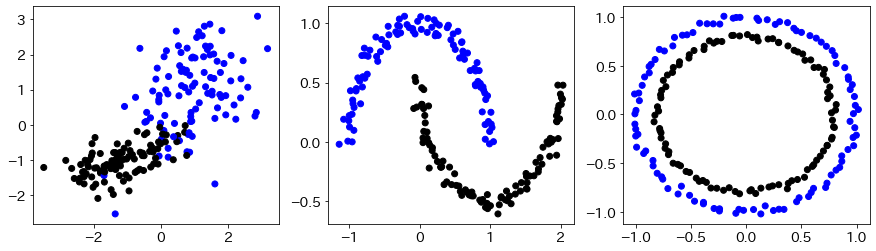

In [2]:
# 線形分離型
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=random_seed,
                             n_clusters_per_class=1, n_samples=200, n_classes=2)

# 三日月型
X2, y2 = make_moons(noise=0.05, random_state=random_seed, n_samples=200)

# 円形（線形分離型）
X3, y3 = make_circles(noise=0.02, random_state=random_seed, n_samples=200)

# ３種類の Data を DataList に保存
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: Data の種類数
N = len(DataList)

# 散布図表示
plt.figure(figsize=(15, 4))

# Color map 定義
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i + 1)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

plt.show()

### 解説

#### 最初の Data
**線形分離可能**と呼ばれ、直線を引くことで Group 分けが可能な Type.境界付近では若干 Data が混在し、完全にきれいには分類できないようになっている。
#### 真ん中の Data
直線では Group 分けできない Type。**「線形分離不可」** と呼ぶことがある。
#### 最後の Data
より複雑な Data で **「線形分離不可」** の Type となる。

### 実務
- 「線形分離可能」な Type において境界付近の混在している Data に対して、各Algorithm がどのような振る舞いをするのかが確認すべき Point の１つ。
- 「線形分離不可」のような複雑な Data に対応可能かどうか、というのも Algorithm の選択 Point の１つとなる。

In [7]:
# 決定境界線の表人関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=random_seed)
    # Color map 定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000ff', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() - 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, 'decision_function'):
        z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        z = z.reshape(f1.shape)
        ax.contour(f1, f2, z, levels=[0], linewidth=2)
    else:
        z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        z = z.reshape(f1.shape)
    ax.contour(f1, f2, z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証: {score_test:.2f} 訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right', fontsize=18)


In [9]:
# 散布図と決定境界の表示関数
def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15, 3))
    for i, data in enumerate(DataList):
        x, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, x, y, algorithm)
    plt.show()

## Logistic 回帰
Algorithm の大まかな流れ
1. 入力変数に１次関数をかけて中間の値 ｕ を計算する。
2. １次関数の計算結果 ｕ を **「Sigmoid」**と呼ばれる関数にかける。この関数は、0 ~ 1 の値をとるので確率値と解釈する。
3. 確率値 y の値が 0.5 より大きい場合は値１を、0.5 より小さい場合は値０を予測結果とする。

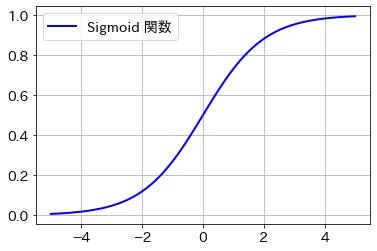

In [3]:
# Sigmoid 関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x の Data 準備
x = np.linspace(-5, 5, 101)

# y の Data 準備
y = sigmoid(x)

# Graph 表示
plt.plot(x, y, label='Sigmoid 関数', c='b', lw=2)

# 凡例表示
plt.legend()

# 方眼表示
plt.grid()

# Graph 描画
plt.show()

### Sigmoid 関数の性質
- 単調関数である（値が単調に増え続ける）
- 値が０から１の間をとる
- Graph にすると点対称な形になり、対称の中心座標は x=0, y=0.5 の点

上記の性質から確率値として扱える。
入力 Data が負の大きな値だと確率は０に近づき正の大きな値だと１に近づく

LogisticRegression(random_state=123)


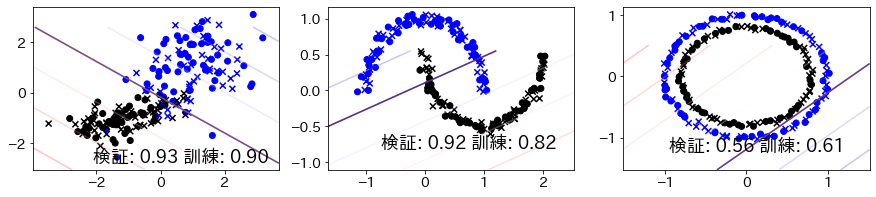

In [15]:
# Logistic 回帰の散布図・分類結果表示

# Algorithm 選択
algorithm = LogisticRegression(random_state=random_seed)

# Algorithm の持つ Parameters の表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

- 左端の線形分離可能な Type に関しては、検証 Data, 訓練 Data ともにほぼ同等の精度が出ていて、汎用性の高い Model ができた。
- 右端の Sample data は、そもそも Data の構造が直線での Group 分けに向いていないため、良い境界線を見つけることができず。精度も低い結果となった。

## Support Vector Machine（Kernel）
分類の境界線を直線でうまく区切れない分布に対して考案された Algorithm.

### Kernel 法の１番基本的な考え方
２次元の入力 Data からできた点を３次元の世界に拡張し平面で２つの Group に分ける。


SVC()


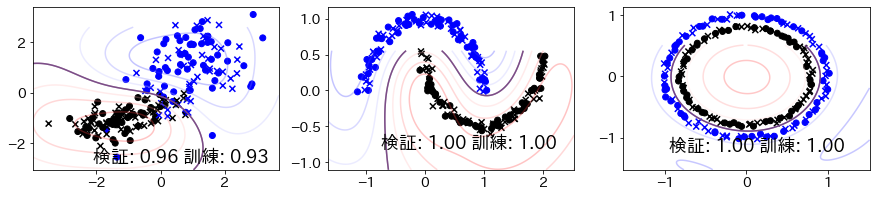

In [17]:
# SVM（Kernel）の散布図・分類結果表示

# Algorithm の選択
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf')

# Algorithm の持つ Parameters の表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

Logistic 回帰ではうまくいかなかった
- 中央
- 右端

の結果が、どちらも Data の特性に対応したきれいな決定境界になった。

## Neural Network
脳の神経細胞（Neuron）の Network を模して作られた Algorithm.
脳細胞間の結合を介して学習が進む。

<small>
数学的な仕組みでいうと、Logistic 回帰 Model に隠れ層 Node を増やしたものに相当する。
</small>

隠れ層が１層だけではなく、２層、３層とより複雑にしていったものが**Deep learning**.

<small>
隠れ層が１層のみのものに限って Neural Network と呼ぶことがある。
</small>

MLPClassifier(random_state=123)


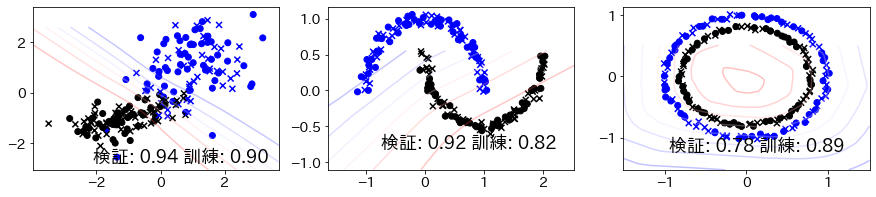

In [18]:
# Neural Network の散布図・分類結果表示

# Algorithm の選択
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)

# Algorithm の持つ Parameters の表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

中央、右端について確かに境界線は直線でなくなっているが、まだ元の Data に十分に適合しているとはいえない。

Parameters のういち隠れ層を２階層にしてみる。（隠れ層の Node 数を(100, 100)に変更してみる）

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=123)


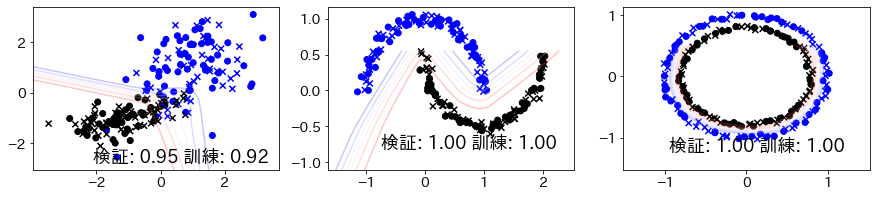

In [19]:
# Neural Network の散布図・分類結果表示

# Algorithm の選択
# 隠れ層 Node 数 = (100, 100)
algorithm = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=random_seed)

# Algorithm の持つ Parameters の表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

中央、右端の Data に対して検証 Data も100％の精度がでた。検証100％だが、過学習ではない、汎用性の高い Model ができたことを意味している。

<small>
Neural Network（Deep learning）の汎化能力の高さを示している。
</small>